<a href="https://colab.research.google.com/github/LikeABug/class_RSU/blob/main/predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación de RSU
SCRIPT de predicción de clases
La función **predict** recibe como argumento la ruta de un archivo tipo JPG o JPEG y devuelve, una matriz de resulados con la probabilidad de 0 - 1 de que la imagen en cuestion pertenezca a cada una de las cuatro clases, ademas devuelve la clase con mayor probabilidad e imprime la definicion de la clase:


0.   Metal
1.   Papel/Carton
2.   Plastico
3.   Vidrio

In [ ]:
#Celda para la ejecucion en google colab, con acceso a carpetas en drive

from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


### Incio de codigo
---



In [ ]:
#Definición de librerias a usar
#carga de pesos y modelo

import numpy as np
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model

longitud, altura = 224, 224                                               #Dimenciones de la imagen
filepath="/gdrive/My Drive/224pixel/checkpoints"                          #Ruta de acceso al archivo de modelo de la red neuronal
pesos_modelo = '/gdrive/My Drive/224pixel/prueba/model_Mobilenet.h5'      #path de acceso a los pesos de la red neuronal
cnn = load_model(filepath)
cnn.load_weights(pesos_modelo)


In [ ]:
#Se define la funcion predict

def predict(file):

  x = load_img(file, target_size=(longitud, altura))    #
  x = img_to_array(x)                                   #  Preprocesamiento de la imagen de entrada
  x = np.expand_dims(x, axis=0)                         #

  array = cnn.predict(x)                                #  .predict pasa la imagen por la red neuronal para determinar la clase
  result = array[0]                                                        #  a la que pertenece la imagen 

  
#el argumento de la matriz con mayor probabilidad es la clase a la que pertenece la imagen
  answer = np.argmax(result)
  if answer == 0:
    print("pred: metal")
  elif answer == 1:
    print("pred: papel")
  elif answer == 2:
    print("pred: plastico")
  elif answer == 3:
    print("pred: vidrio")

  grafica(result)

  return answer,result                                  #Se retorna la posicion de la clase con mayor probabilidad 
                                                        #y la matriz de resultados

pred: plastico


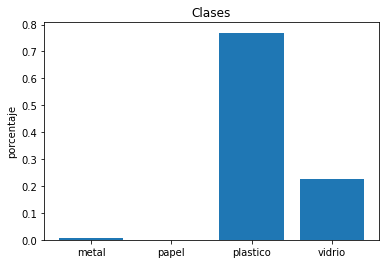

(2, array([5.6108572e-03, 3.6306152e-04, 7.6949352e-01, 2.2453260e-01],
       dtype=float32))

In [ ]:
predict("/content/plastico (1).jpeg")

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

clases = ["metal", "papel", "plastico", "vidrio"]

In [ ]:
def grafica(result):
  fig, ax = plt.subplots()
  #Colocamos una etiqueta en el eje Y
  ax.set_ylabel('porcentaje')
  #Colocamos una etiqueta en el eje X
  ax.set_title('Clases')

  plt.bar(clases, result)
  #Finalmente mostramos la grafica con el metodo show()
  plt.show()